In [2]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torch.optim as optimizer

from matplotlib import pyplot as plt
import numpy as np
import torchvision.transforms as transforms

**Load dataset**

In [ ]:
dataset_root = './mnist_dataset'

train_dataloader = DataLoader(torchvision.datasets.MNIST(dataset_root, download=True, train=True, transform=torchvision.transforms.Compose(
                              [torchvision.transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])), batch_size=100, shuffle=True)

torch.Size([100, 1, 28, 28])
100


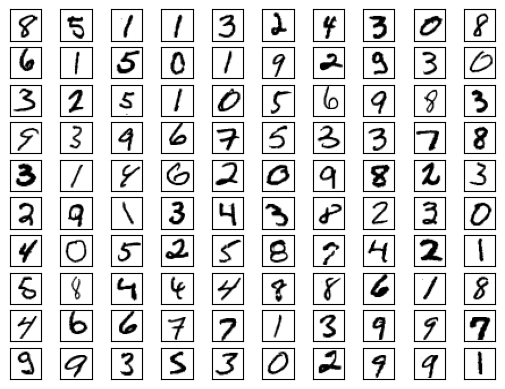

In [6]:
real_samples, mnist_labels = next(iter(train_dataloader))
print(real_samples.shape)
print(len(real_samples))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

--------------
**Discriminator and Generator architecture**

In [ ]:
### Discriminator
class Discriminator(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(64)
    self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=0)
    self.bn2 = nn.BatchNorm2d(128)
    self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(256)
    self.conv4 = nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=0)
    self.bn4 = nn.BatchNorm2d(512)
    self.conv5 = nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0)

  def forward(self, x):
    x = self.bn1(self.conv1(x))
    x = nn.LeakyReLU(0.2)(x)

    x = self.bn2(self.conv2(x))
    x = nn.LeakyReLU(0.2)(x)

    x = self.bn3(self.conv3(x))
    x = nn.LeakyReLU(0.2)(x)

    x = self.bn4(self.conv4(x))
    x = nn.LeakyReLU(0.2)(x)

    x = torch.sigmoid(self.conv5(x))
    return x.squeeze()

In [ ]:
### Generator

class Generator(nn.Module):
  def __init__(self, distribuional_dim) -> None:
    super().__init__()
    
    self.convT1 = nn.ConvTranspose2d(in_channels=distribuional_dim, out_channels=512, kernel_size=4, stride=1, padding=0)  
    #output = (1 - 1)*0 - 2*0 + (4 - 1) + 1 = 4*4*512
    self.bn1 = nn.BatchNorm2d(512)

    self.convT2 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=0)
    #output = (4-1)*2 - 0 + (4-1) + 1 =10*10*256
    self.bn2 = nn.BatchNorm2d(256)

    self.convT3 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=0)
    #output = (10-1)*2 - 0 + (4-1) + 1 = 22*22*128
    self.bn3 = nn.BatchNorm2d(128)

    self.convT4 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=1, padding=0)
    #output = (22-1)*1 - 0 + (4-1) + 1 = 25*25*64
    self.bn4 = nn.BatchNorm2d(64)

    self.convT5 = nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=4, stride=1, padding=0)
    #output = (25-1)*1 - 0 + (4-1) + 1 = 28*28*1


  def forward(self, x): 
    x = torch.relu(self.bn1(self.convT1(x)))
    x = torch.relu(self.bn2(self.convT2(x)))
    x = torch.relu(self.bn3(self.convT3(x)))
    x = torch.relu(self.bn4(self.convT4(x)))

    return torch.tanh(self.convT5(x))

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

--------
**Hyperparameters**

In [43]:
z_dim = 100  # noise dimension
image_dim = 28*28*1 

discriminator = Discriminator().to(device)
generator = Generator(z_dim).to(device)

In [44]:
learning_rate = 0.0002

batch_size = 32
epochs = 20

optimizer_disc = optimizer.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_gen = optimizer.Adam(generator.parameters(), lr=learning_rate)

loss = nn.BCELoss()

--------
**Train discriminator and generator.**

Epoch: 0
loss_discriminator:4.699478187902676, loss_generator: 503.444343931973


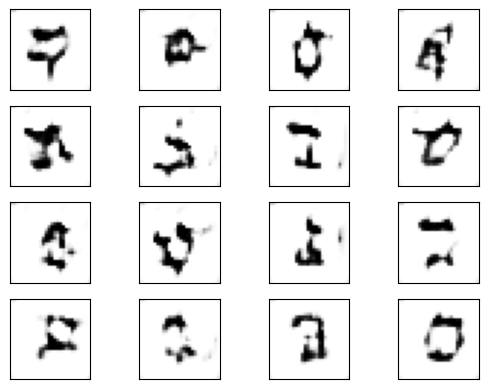

Epoch: 1
loss_discriminator:23.705685004339102, loss_generator: 205.60330513119698
Epoch: 2
loss_discriminator:34.44752877749852, loss_generator: 151.03378837555647
Epoch: 3
loss_discriminator:42.51741319609573, loss_generator: 125.92364289797843
Epoch: 4
loss_discriminator:44.34862451913068, loss_generator: 117.86020282842219
Epoch: 5
loss_discriminator:44.80598133534659, loss_generator: 116.57731952890754


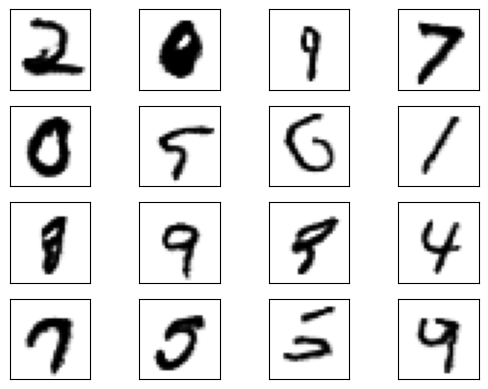

Epoch: 6
loss_discriminator:45.95129762002034, loss_generator: 114.64306369423866
Epoch: 7
loss_discriminator:47.17136666376609, loss_generator: 112.53323635086417
Epoch: 8
loss_discriminator:46.208076324895956, loss_generator: 112.13395618274808
Epoch: 9
loss_discriminator:44.42837086925283, loss_generator: 117.89858930371702
Epoch: 10
loss_discriminator:43.40179302345496, loss_generator: 122.33038605563343


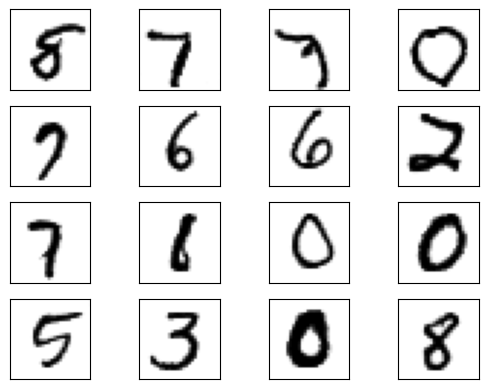

Epoch: 11
loss_discriminator:43.19190375719336, loss_generator: 121.72765780054033
Epoch: 12
loss_discriminator:42.67249860978336, loss_generator: 121.88734497409314
Epoch: 13
loss_discriminator:43.51163034175988, loss_generator: 122.92504891566932
Epoch: 14
loss_discriminator:43.199859677028144, loss_generator: 122.49581566266716
Epoch: 15
loss_discriminator:43.819716956146294, loss_generator: 123.6751563930884


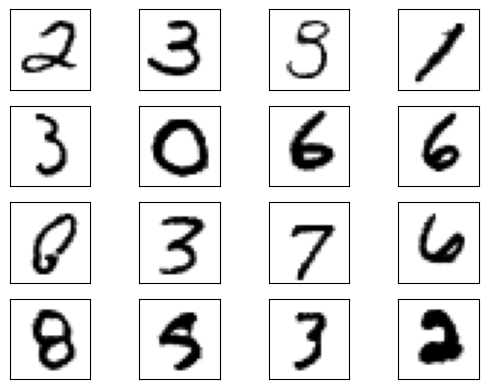

Epoch: 16
loss_discriminator:42.67756620225555, loss_generator: 124.97794598340988
Epoch: 17
loss_discriminator:42.3983807945915, loss_generator: 127.55676400382072
Epoch: 18
loss_discriminator:41.7920238522056, loss_generator: 127.45059176720679
Epoch: 19
loss_discriminator:41.13008054810052, loss_generator: 130.51742488052696


Generator(
  (convT1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convT2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convT3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convT4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convT5): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(1, 1))
)

In [45]:
discriminator.train()
generator.train()

for epoch in range(epochs):

  g_loss, lossD = 0, 0

  for batch_idx, (real, _) in enumerate(train_dataloader):

      ### train dicriminator
      discriminator.zero_grad()

      # real 
      real = real.to(device=device)
      real = real.to(torch.float32)
      real = real.view(-1, 1, 28, 28)

      disc_real = discriminator(real)
      lossD_real = loss(disc_real, torch.ones_like(disc_real))

      lossD_real.backward()
      lossD += lossD_real.item() / batch_size

      # fake
      noise = torch.randn(real.shape[0], z_dim, 1, 1).to(device)
      fake_img = generator(noise)

      disc_fake = discriminator(fake_img.detach())
      lossD_fake = loss(disc_fake, torch.zeros_like(disc_fake))
      lossD_fake.backward()
      lossD += lossD_fake.item() / batch_size

      optimizer_disc.step()

      ### train generator
      generator.zero_grad()

      output = discriminator(fake_img)
      lossG = loss(output, torch.ones_like(output))
      lossG.backward()
      g_loss += lossG.item() / batch_size
      optimizer_gen.step()

  print(f'Epoch: {epoch}')
  print(f'loss_discriminator:{lossD}, loss_generator: {g_loss}')

  if epoch % 5 == 0:
    generated_samples = generator(noise)
    generated_samples = generated_samples.cpu().detach()
    for i in range(16):
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
      plt.xticks([])
      plt.yticks([])
    plt.show()

discriminator.eval()
generator.eval()

In [55]:
torch.save(generator.state_dict(), './generator.pt')

In [56]:
generator.load_state_dict(torch.load('./generator.pt'))

<All keys matched successfully>

-------
**Testing the model with generating new examples.**

In [68]:
noise = torch.randn(100, z_dim, 1, 1).to(device)
generated_samples = generator(noise)

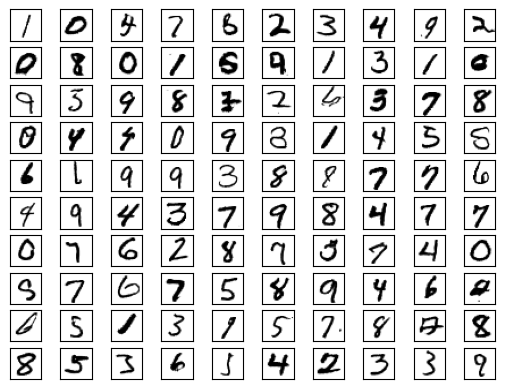

In [69]:
generated_samples = generated_samples.cpu().detach()
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

**On the pictures above, we can see fully generated images of handwritten digits from the noise with trained DCGAN.**